# Diagrams

## 2D vectors and points

### Vectors
Vectors in `diagrams` are based on the [linear](http://hackage.haskell.org/package/linear) package. In two dimensions, you can think of a vector as a pair of coordinates, representing displacements in the $x$ and $y$ directions. Alternatively, you can think of a vector as consisting of a magnitude (length) and a direction (angle).

In [1]:
import Diagrams.Prelude

In [2]:
v=(3 ^& 6) :: V2 Double
print v

V2 3.0 6.0

One of the most important things to understand about vectors is that they are translation-invariant: that is, they have no specific location in space, and are unaffected by translations:

In [3]:
translateX 19 v

V2 3.0 6.0

Vectors are affected by other sorts of transformation such as scaling and rotation:

In [4]:
rotateBy (1/4) v

V2 (-6.0) 3.0000000000000004

#### Type and value constructor
- `V2`: defined in `Linear.V2`
  ```haskell
    data V2 a = V2 !a !a deriving(Eq,Ord,Show,Read,Data,Generic,Generic1,Lift)
  ```
  Note: `!` is the [strictness operator](https://wiki.haskell.org/Keywords#.21).

#### Builders
- `zero`: zero vector
- `unitX` and `unitY`: unit vectors in $x$ and $y$ directions respectively
- `unit_X` and `unit_Y`: unit vectors in the negative direction
- `r2` - constructor with a tuple of pair as input: `r2::(n,n)->V2 n`
- `^&` - an infix builder
- `fromDirection`

##### `r2`

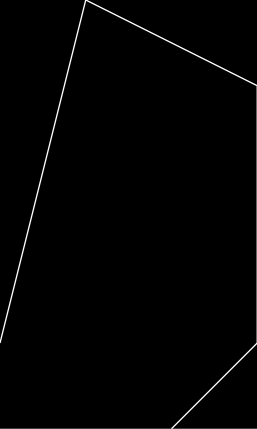

In [5]:
diagram $ (fromOffsets . map r2 $ [(1,1), (0,3), (-2,1), (-1,-4)]) # bg black # lc white

This is the same with the value constructor:

In [6]:
:set -XTypeFamilies

example=fromOffsets [V2 1 1, V2 0 3, V2 (-2) 1, V2 (-1) (-4)]

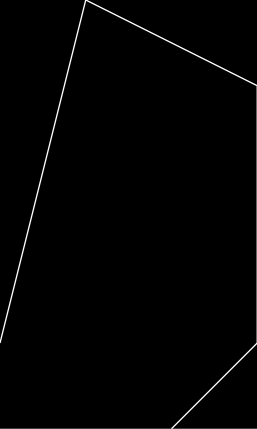

In [7]:
import Diagrams.Prelude hiding (V2)

diagram example # bg black # lc white

##### Unit vector builders

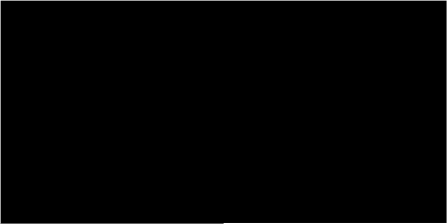

In [8]:
diagram $ fromOffsets [unitX, unitY, 2 *^ unit_X, unit_Y] # centerXY # bg black # lc white

##### `^&`

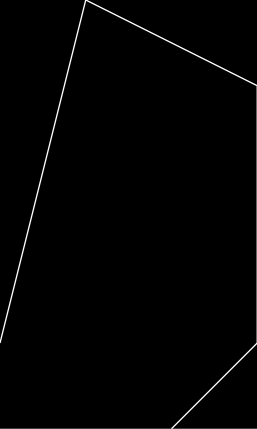

In [9]:
diagram $ fromOffsets [1 ^& 1, 0 ^& 3, (-2) ^& 1, (-1) ^& (-4)] # bg black # lc white

### Vector operators
- add and substract
- multiplication by scalar
- norm
- project
- dot

In [10]:
import IHaskell.Display.Graphviz hiding (dot)

In [11]:
a = r2 (1,0)
b = r2 (0,1)

In [12]:
a `dot` b

0

In [13]:
project a b

V2 0.0 0.0

In [14]:
2*a

V2 2 0

In [15]:
a^+^b

V2 1 1

In [16]:
a^-^b

V2 1 (-1)

In [17]:
:t project

project :: forall (v :: * -> *) a. (Metric v, Fractional a) => v a -> v a -> v a

In [18]:
:t dot

dot :: forall (f :: * -> *) a. (Metric f, Num a) => f a -> f a -> a

In [26]:
translateX 19 $ r2 (3,6)

V2 3 6